
## Normalization (정규화)

1. square root (제곱근)
2. box-cox 
3. QuantileTransformer
4. PowerTransformer

[결과 review]
* 워낙 한쪽으로 치중된 데이터라 모든 방법이 정규화 시키는 데에는 실패했지만,  <br>
QuantileTransformer 와 PowerTransformer가 가장 효과가 강한것으로 확인

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
import scipy as sp

In [6]:
# warning 무시
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
set2 = pd.read_csv('./ABtest-set2.csv')

In [7]:
variant_target = ['2inhJAml', 'DloRdaZ3', 'Ywlwn6xf', 'nY5IppFT', 'qTnkdYxH']
set2_variant=set2[(set2['abtest.variant'].isin(['2inhJAml', 'DloRdaZ3', 'OorVmHga', 'Ywlwn6xf', 'nY5IppFT', 'qTnkdYxH']))]
set2_variant_target=set2_variant[set2_variant['abtest.variant'].isin(variant_target)]
set2_clicksum=set2_variant_target[['abtest.variant','abtest.visit_type','abtest.visits','abtest.hubtab','abtest.newsbox','abtest.search_issue','abtest.hotissue','abtest.favorite_site']]
set2_clicksum['sum']= set2_clicksum['abtest.hubtab']+set2_clicksum['abtest.newsbox']+set2_clicksum['abtest.search_issue']+set2_clicksum['abtest.hotissue']

In [8]:
set2_more10=set2_clicksum[set2_clicksum['sum']>10]

In [9]:
# box-cox로 데이터변환하려면 0 값 제외해야함.
group1_hotissue=set2_more10[set2_more10['abtest.variant']==variant_target[0]]['abtest.hotissue'].values
group1_hotissue=group1_hotissue[group1_hotissue>0]
group1_hotissue

array([2, 1, 4, ..., 2, 2, 7], dtype=int64)

### [1] square root

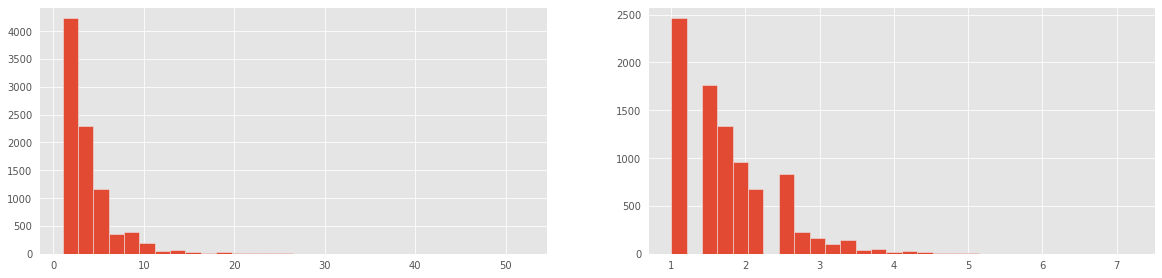

In [10]:
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.subplot(2, 2, 1)
plt.hist(group1_hotissue, bins=30)
plt.subplot(2, 2, 2)
plt.hist(group1_hotissue**(1/2), bins=30)
plt.show()

### [2] box-cox

In [11]:
from scipy.stats import boxcox
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from matplotlib import pyplot

In [12]:
seed(1)
# power transform
group1_hotissue_bc = boxcox(group1_hotissue, 0)

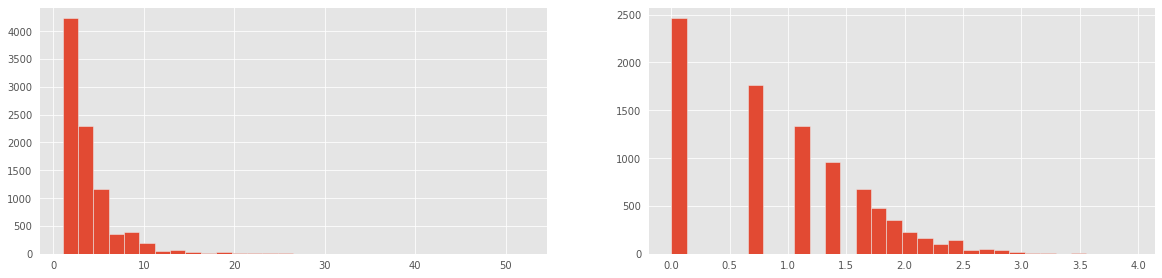

In [13]:
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.subplot(2, 2, 1)
plt.hist(group1_hotissue, bins=30)
plt.subplot(2, 2, 2)
plt.hist(group1_hotissue_bc, bins=30)
plt.show()

### [3] QuantileTransformer

In [15]:
from sklearn.preprocessing import QuantileTransformer

In [16]:
group1_hotissue=set2_more10[set2_more10['abtest.variant']==variant_target[0]]['abtest.hotissue'].values
group1_hotissue

array([2, 1, 0, ..., 0, 2, 7], dtype=int64)

In [17]:
qt = QuantileTransformer(output_distribution='normal')
group1_hotissue_qt = qt.fit_transform(group1_hotissue.reshape(-1,1))
group1_hotissue_qt 

array([[ 0.14985264],
       [-0.27830169],
       [-5.19933758],
       ...,
       [-5.19933758],
       [ 0.14985264],
       [ 1.40117696]])

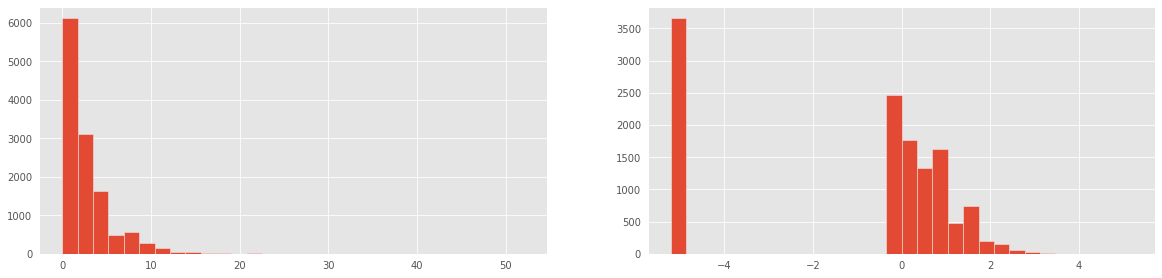

In [18]:
# Plot histograms to see before vs after.
import matplotlib.pyplot as plt
%matplotlib inline 
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.subplot(2, 2, 1)
plt.hist(group1_hotissue, bins=30)
plt.subplot(2, 2, 2)
plt.hist(group1_hotissue_qt, bins=30)
plt.show()

### [4] PowerTransformer

In [19]:
from sklearn.preprocessing import PowerTransformer

In [20]:
pt = PowerTransformer()
group1_hotissue_pt = pt.fit_transform(group1_hotissue.reshape(-1,1))
group1_hotissue_pt

array([[ 0.25891043],
       [-0.27565221],
       [-1.29288903],
       ...,
       [-1.29288903],
       [ 0.25891043],
       [ 1.39056421]])

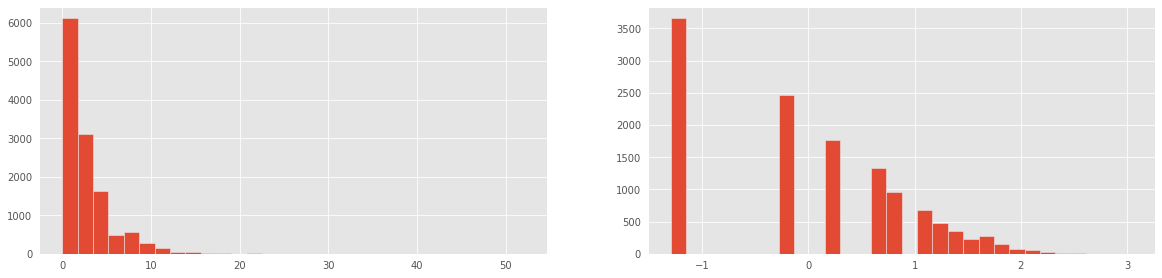

In [21]:
# Plot histograms to see before vs after.
import matplotlib.pyplot as plt
%matplotlib inline 
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.subplot(2, 2, 1)
plt.hist(group1_hotissue, bins=30)
plt.subplot(2, 2, 2)
plt.hist(group1_hotissue_pt, bins=30)
plt.show()